In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import model_selection


breast_cancer_df = pd.read_csv('breast-cancer.csv')
breast_cancer_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


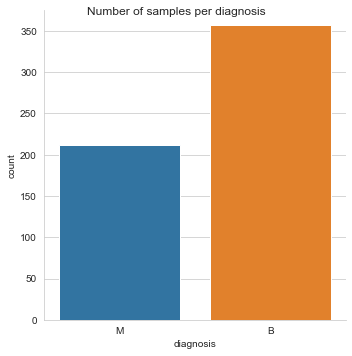

In [157]:
plot = sns.catplot(data=breast_cancer_df, x='diagnosis', kind='count')
plot.fig.suptitle('Number of samples per diagnosis')
plt.show()

#encoding the diagnosis feature since it categorical
breast_cancer_df['diagnosis'] = breast_cancer_df.diagnosis.replace({'M': 0,'B':1})

                      id  diagnosis  radius_mean  texture_mean  \
id              1.000000  -0.039769     0.074626      0.099770   
diagnosis      -0.039769   1.000000    -0.730029     -0.415185   
radius_mean     0.074626  -0.730029     1.000000      0.323782   
texture_mean    0.099770  -0.415185     0.323782      1.000000   
perimeter_mean  0.073159  -0.742636     0.997855      0.329533   

                perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
id                    0.073159   0.096893        -0.012968          0.000096   
diagnosis            -0.742636  -0.708984        -0.358560         -0.596534   
radius_mean           0.997855   0.987357         0.170581          0.506124   
texture_mean          0.329533   0.321086        -0.023389          0.236702   
perimeter_mean        1.000000   0.986507         0.207278          0.556936   

                concavity_mean  concave points_mean  ...  radius_worst  \
id                    0.050080             0.044

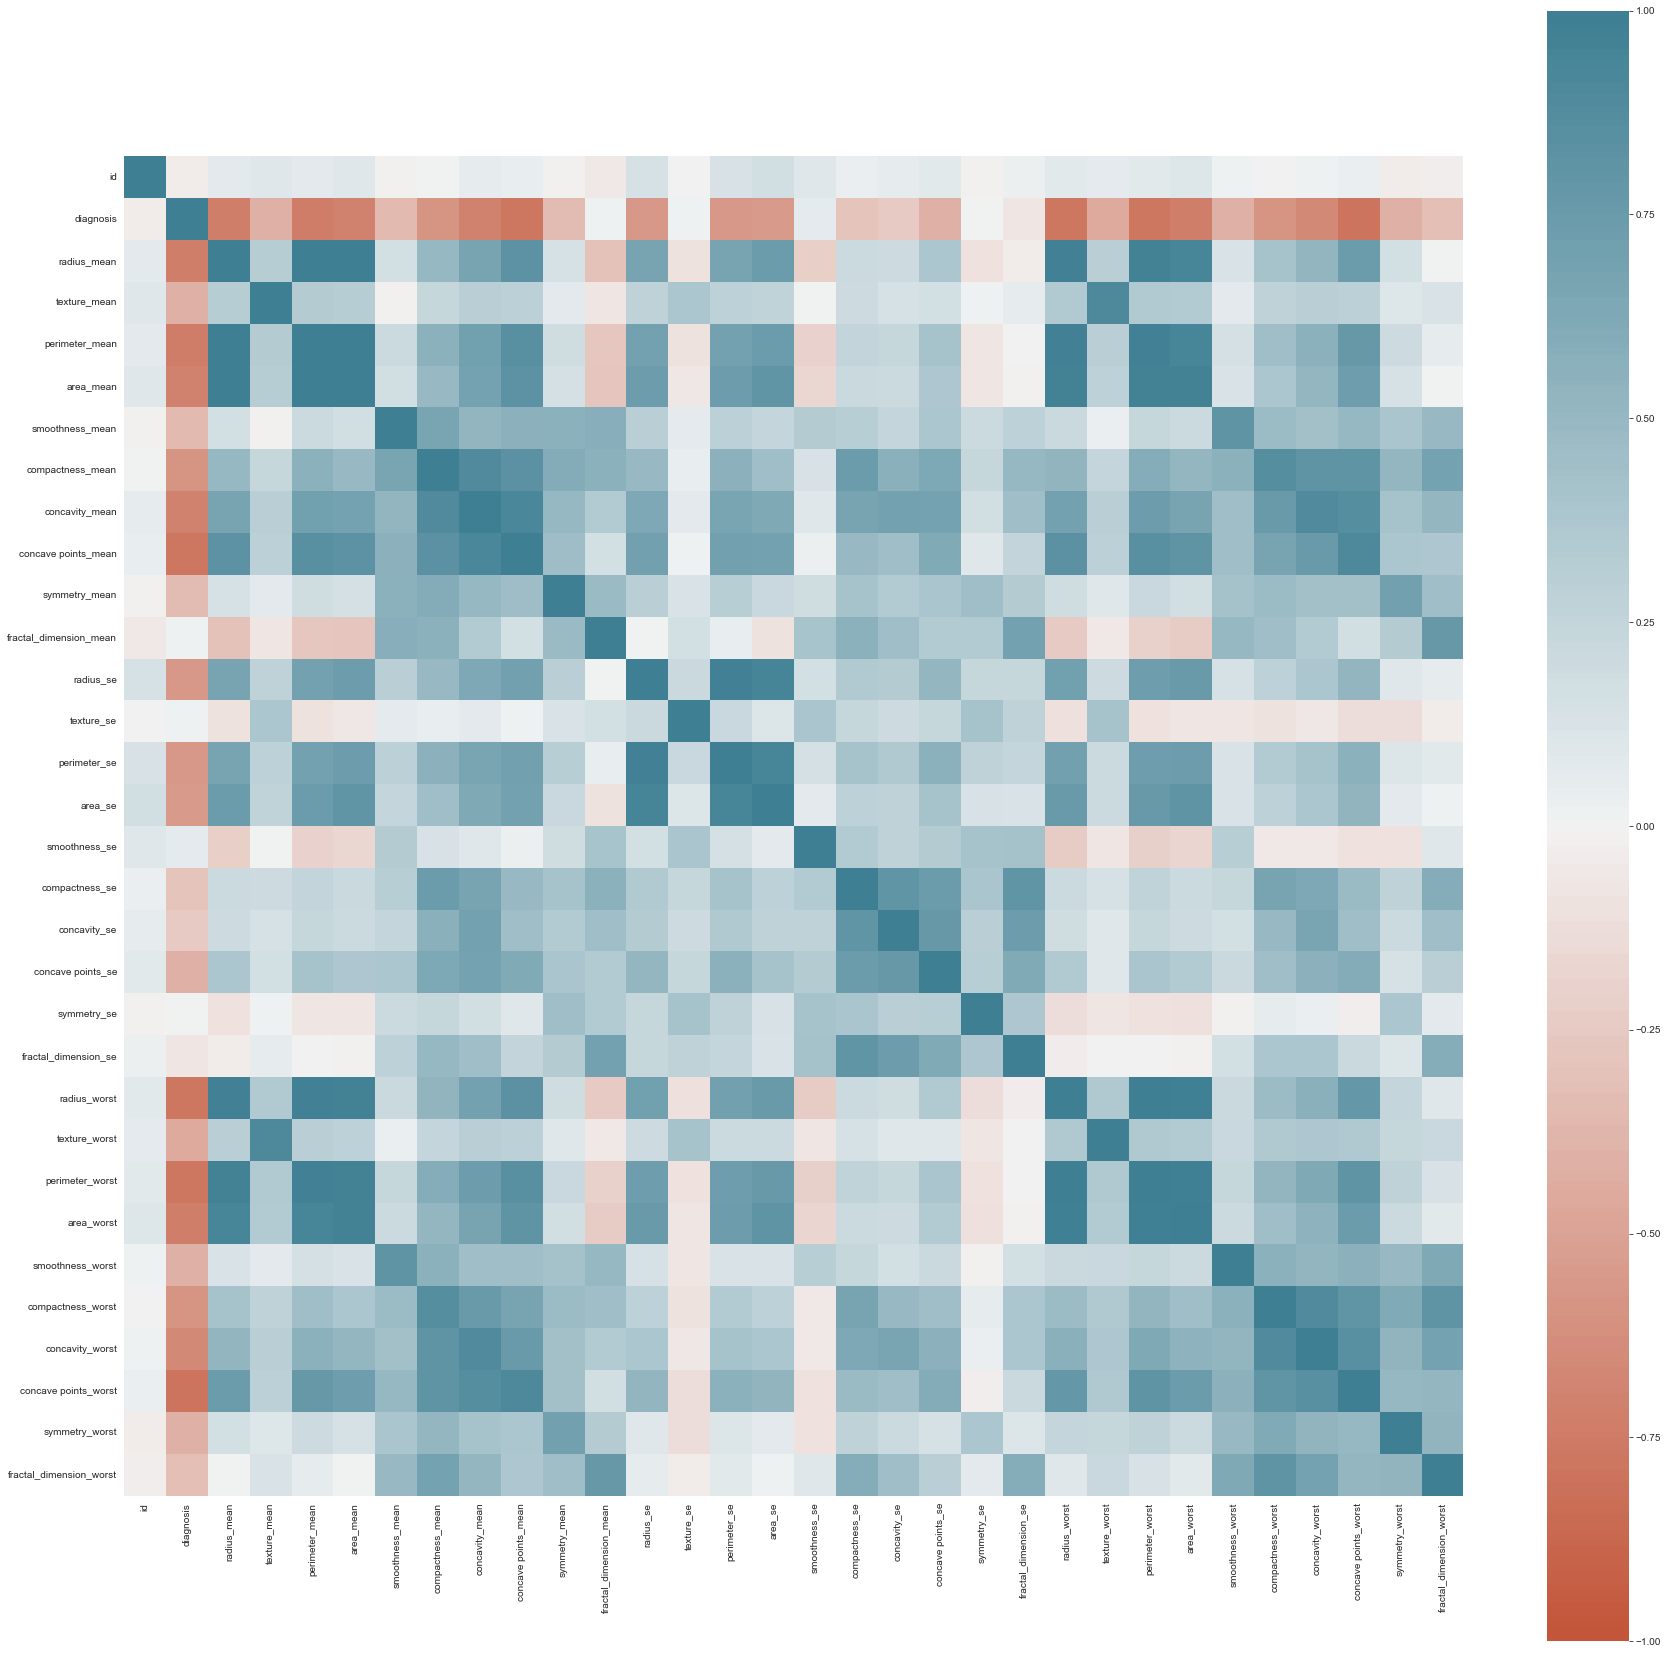

In [158]:
corr = breast_cancer_df.corr()
print(corr.head())

plt.figure(figsize = (30,30))
import seaborn as sns
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

                       var1        id  diagnosis  radius_mean  texture_mean  \
0                        id  1.000000  -0.039769     0.074626      0.099770   
1                 diagnosis -0.039769   1.000000    -0.730029     -0.415185   
2               radius_mean  0.074626  -0.730029     1.000000      0.323782   
3              texture_mean  0.099770  -0.415185     0.323782      1.000000   
4            perimeter_mean  0.073159  -0.742636     0.997855      0.329533   
5                 area_mean  0.096893  -0.708984     0.987357      0.321086   
6           smoothness_mean -0.012968  -0.358560     0.170581     -0.023389   
7          compactness_mean  0.000096  -0.596534     0.506124      0.236702   
8            concavity_mean  0.050080  -0.696360     0.676764      0.302418   
9       concave points_mean  0.044158  -0.776614     0.822529      0.293464   
10            symmetry_mean -0.022114  -0.330499     0.147741      0.071401   
11   fractal_dimension_mean -0.052511   0.012838    

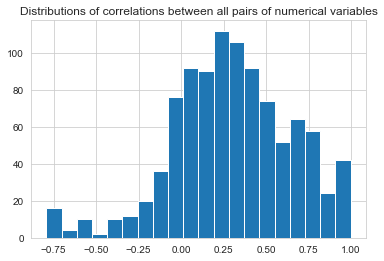

In [159]:
#code from principle of data science Labs solutions
corr1=corr.copy()

#In the correlation matrix, each *row* has the variable name
#as the index, but we need this to be a new column
corr1.index.name = 'var1'
corr1.reset_index(inplace=True)

print(corr1)
#Now we "melt" the table, preserving the column we've just made.
corr_pair=corr1.melt(id_vars=['var1'])
#Now we just replace the some of the column names with more sensible ones
corr_pair=corr_pair.rename(columns={'variable': 'var2','value': 'corr'})
#Now, we remove rows where var1 and var2 are the same (these are always 1)
corr_pair = corr_pair.drop(corr_pair[corr_pair['var1']==corr_pair['var2']].index)

plt.hist(corr_pair['corr'],20)
plt.title("Distributions of correlations between all pairs of numerical variables")

#Now we sort the rows on the correlation
corr_pair=corr_pair.sort_values(by ='corr',ascending=False)

print()
print("Top ten most positively correlated pairs of variables")
print(corr.head(10))

print()
print("Top ten most negatively correlated pairs of variables (in reverse order)")
print(corr.tail(10))

#Add a column with the absolute correlation, so we can sort on
#amount of correlation, regardless of the sign if we want
corr_pair['abs_corr']=abs(corr_pair['corr'])
#Sort on this
corr_pair=corr_pair.sort_values(by ='abs_corr',ascending=False)

print(corr_pair.columns)
print("Top ten most correlated pairs of variables with 'diagnosis'")
print(corr_pair[corr_pair['var1']=='diagnosis'].head(10))

In [160]:
corr_pair[corr_pair['var1']=='diagnosis'].head(10).to_csv('sample.csv')

In [161]:
breast_cancer_df.drop_duplicates(subset= None, inplace= True)

In [162]:
breast_cancer_df.to_csv(r'C:\Users\kmkad\Dropbox\Personal\University Of london\Semester 1\INM431 Machine Learning\coursework\breast_cancer_df.csv',index = False, header=True)

In [163]:
#saving data with just the features to csv
bc_fs = breast_cancer_df[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']].copy()

bc_fs.to_csv('bc_fs.csv', index=False)

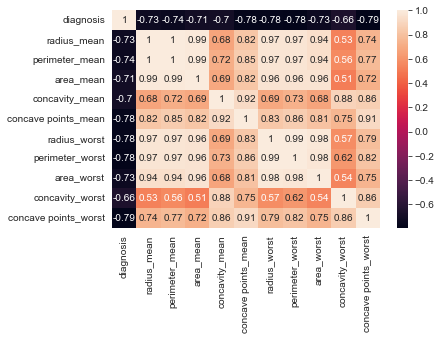

In [164]:
#code from https://datatofish.com/correlation-matrix-pandas/
corr_matrix = bc_fs.corr()
#print(corr_matrix)

sns.heatmap(corr_matrix, annot=True)
ax.set_title('correlation matrix for selected features')
plt.show()

In [165]:
# calulating the statistical measures of the features
X = np.array(bc_fs)
# Calculate the mean of each feature
mean = np.mean(X, axis=0)
# Calculate the standard deviation of each feature
std = np.std(X, axis=0)
# Calculate the minimum value of each feature
min_val = np.min(X, axis=0)
# Calculate the maximum value of each feature
max_val = np.max(X, axis=0)

# List of feature names
feature_names = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']

# Create a list of dictionaries, where each dictionary represents a row in the table
data = [{'Feature': feature_names[i], 'Mean': mean[i], 'Std': std[i], 'Min': min_val[i], 'Max': max_val[i]} for i in range(len(feature_names))]

# Use the tabulate function to print the table
print(tabulate(data, headers='keys', tablefmt='grid'))


+----------------------+-------------+-------------+---------+-----------+
| Feature              |        Mean |         Std |     Min |       Max |
+======================+=============+=============+=========+===========+
| radius_mean          |   0.627417  |   0.483493  |   0     |    1      |
+----------------------+-------------+-------------+---------+-----------+
| perimeter_mean       |  14.1273    |   3.52095   |   6.981 |   28.11   |
+----------------------+-------------+-------------+---------+-----------+
| area_mean            |  91.969     |  24.2776    |  43.79  |  188.5    |
+----------------------+-------------+-------------+---------+-----------+
| concavity_mean       | 654.889     | 351.605     | 143.5   | 2501      |
+----------------------+-------------+-------------+---------+-----------+
| concave points_mean  |   0.0887993 |   0.0796497 |   0     |    0.4268 |
+----------------------+-------------+-------------+---------+-----------+
| radius_worst         | 

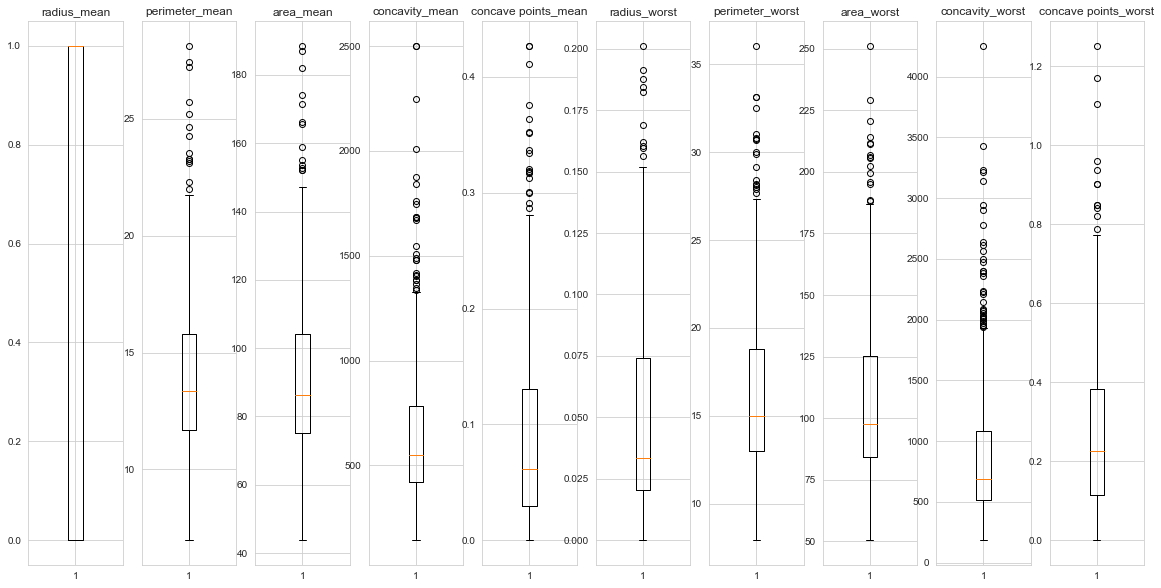

In [166]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, len(feature_names), figsize=(20,10))

# Iterate over the subplots and plot the data for each feature
for ax, feature in zip(axs, feature_names):
    ax.boxplot(X[:, feature_names.index(feature)])
    ax.set_title(feature)

# Show the plot
plt.show()
